In [36]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import matplotlib.pyplot as plt
import random

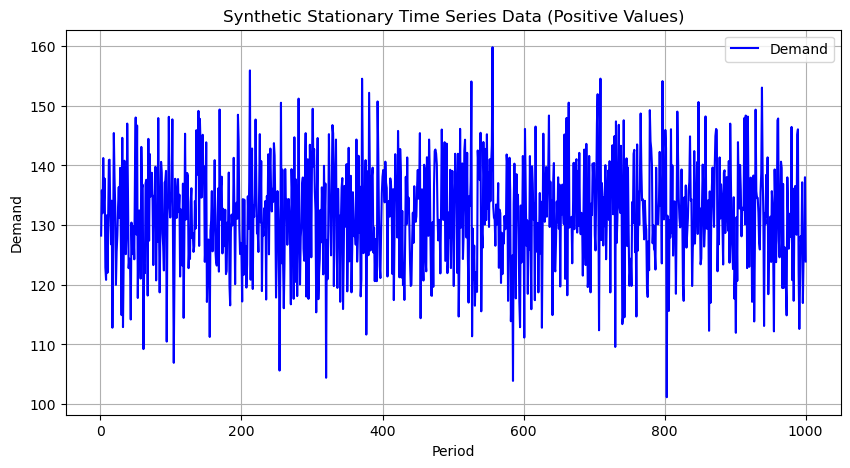

In [37]:
# Set seed for reproducibility
np.random.seed(61)

# Generate a stationary time series: AR(1) process
n_points = 1000
# phi = 1  # Autoregressive coefficient (stationarity: |phi| < 1)
noise_std = random.uniform(0,10)  # Standard deviation of white noise
base_demand = random.randint(100,175)  # Shift to ensure positivity

# Initialize the series
demand = []  # Start with a positive base demand
noise = np.random.normal(0, noise_std, n_points)

# Generate AR(1) stationary process
# for t in range(1, n_points):
#     next_value = phi * demand[t - 1] + noise[t]
#     demand.append(next_value)  # Ensure positive values by capping at 1
#     
for t in range(0, n_points):
    next_value = base_demand + noise[t]
    demand.append(next_value)

# Convert to a Pandas DataFrame
time_series_data = pd.DataFrame({'Period': range(1, n_points + 1), 'Demand': demand})

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(time_series_data['Period'], time_series_data['Demand'], label='Demand', color='blue')
plt.title('Synthetic Stationary Time Series Data (Positive Values)')
plt.xlabel('Period')
plt.ylabel('Demand')
plt.grid()
plt.legend()
plt.show()

demand_data = time_series_data['Demand']
# Print the first few rows of the dataset
# print(time_series_data.head())

# Save the dataset to a CSV file (optional)
# time_series_data.to_csv('positive_stationary_demand_data.csv', index=False)

In [38]:
data = demand_data.values
type(data)

numpy.ndarray

In [39]:
model = ARIMA(demand_data, order=(10,1,5))
model_fit = model.fit()

C:\Users\shivam.vedant\.conda\envs\venv_energiapy\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\shivam.vedant\.conda\envs\venv_energiapy\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\shivam.vedant\.conda\envs\venv_energiapy\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


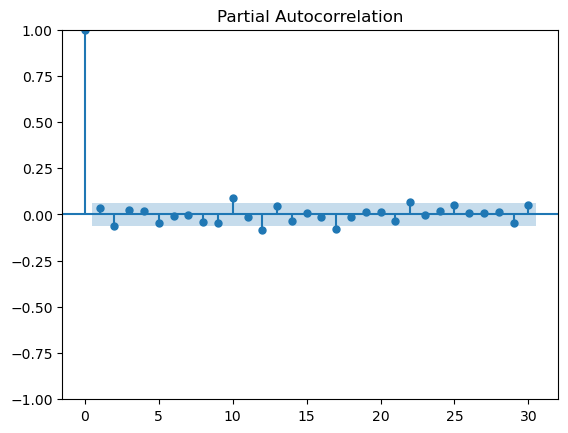

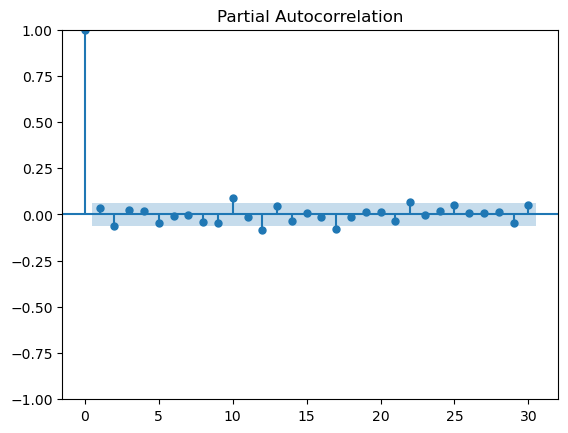

In [40]:
plot_pacf(demand_data)

In [41]:
steps_ahead = 5
forecast = model_fit.forecast(steps=steps_ahead)

In [42]:
print(f"Multi-Step Forecast for next {steps_ahead} periods: \n{forecast}")

Multi-Step Forecast for next 5 periods: 
1000    129.937166
1001    133.428022
1002    132.314089
1003    130.903515
1004    133.522470
Name: predicted_mean, dtype: float64
